In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns; sns.set()
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
print(f"Rows: ", df.shape[0])
print(f"Columns: ", df.shape[1])

Rows:  7043
Columns:  21


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df = df.drop('customerID',axis=1)

In [ ]:
#convert totalcharges column into float datatype
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

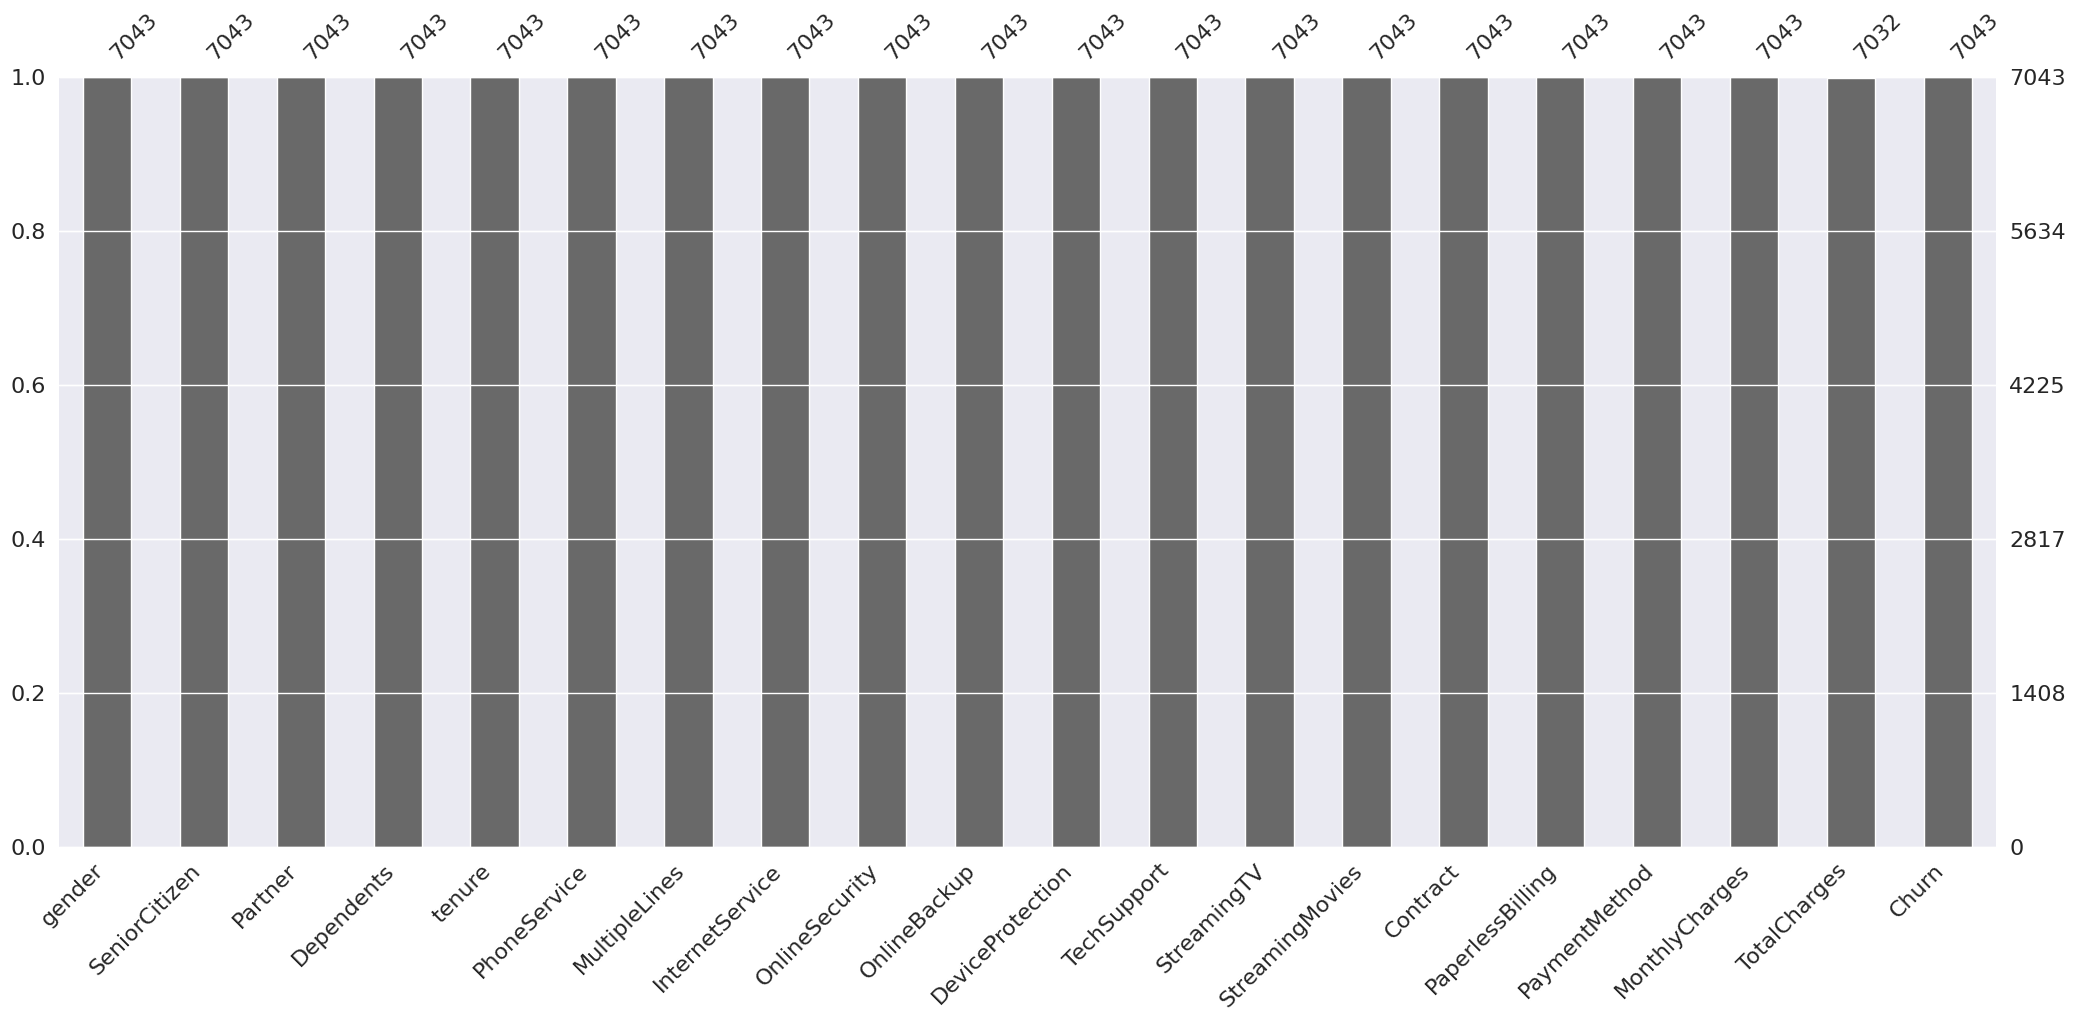

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

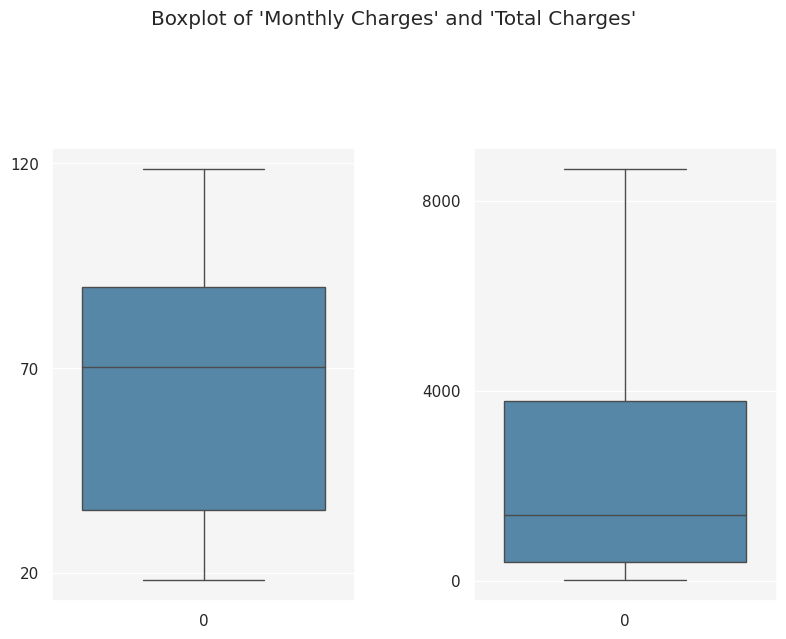

In [ ]:
# draw a boxplot to check for outliers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
fig.suptitle("Boxplot of 'Monthly Charges' and 'Total Charges'")

boxprops = whiskerprops = capprops = medianprops = dict(linewidth=1)

sns.boxplot(df['MonthlyCharges'], orient='v', color='#488ab5', ax=ax[0],
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops)
ax[0].set_facecolor('#f5f5f5')
ax[0].set_yticks([20, 70, 120])

sns.boxplot(df['TotalCharges'], orient='v', color='#488ab5', ax=ax[1],
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops)
ax[1].set_facecolor('#f5f5f5')
ax[1].set_yticks([0, 4000, 8000])

plt.tight_layout(pad=4.0);

In [ ]:
print(df['Churn'].value_counts())
print('\nTotal Churn Rate: {:.2%}'.format(df[df['Churn'] == 'Yes'].shape[0] / df.shape[0]))

No     5174
Yes    1869
Name: Churn, dtype: int64

Total Churn Rate: 26.54%


In [ ]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='object').keys())

print('CATEGORICAL VARIABLES: ',cat)

print('NUMERICAL VARIABLES: ',num)

CATEGORICAL VARIABLES:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
NUMERICAL VARIABLES:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())


Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV

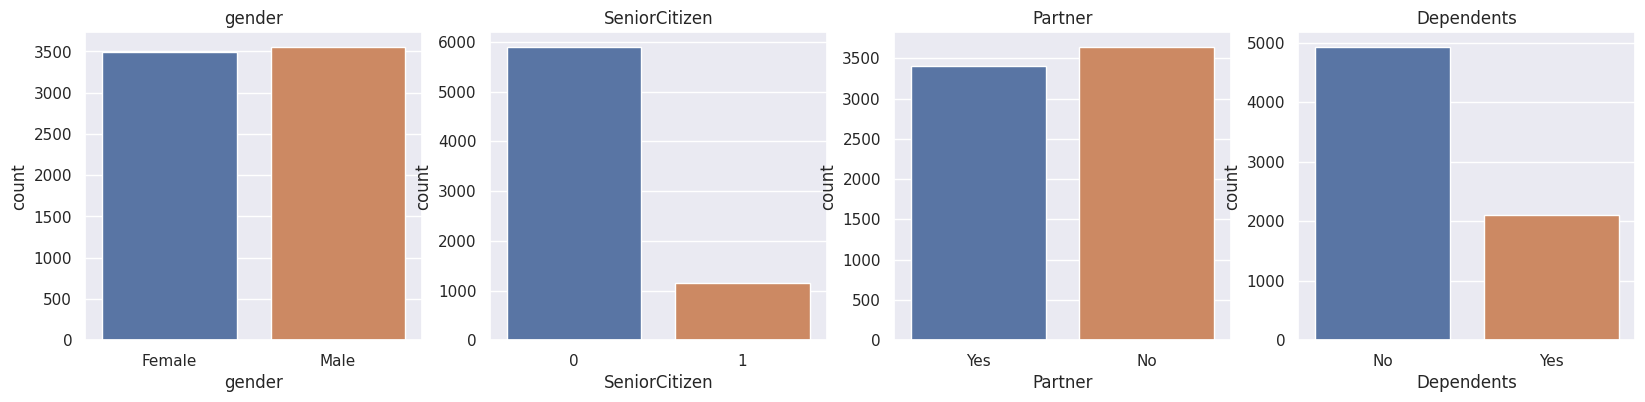

In [ ]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

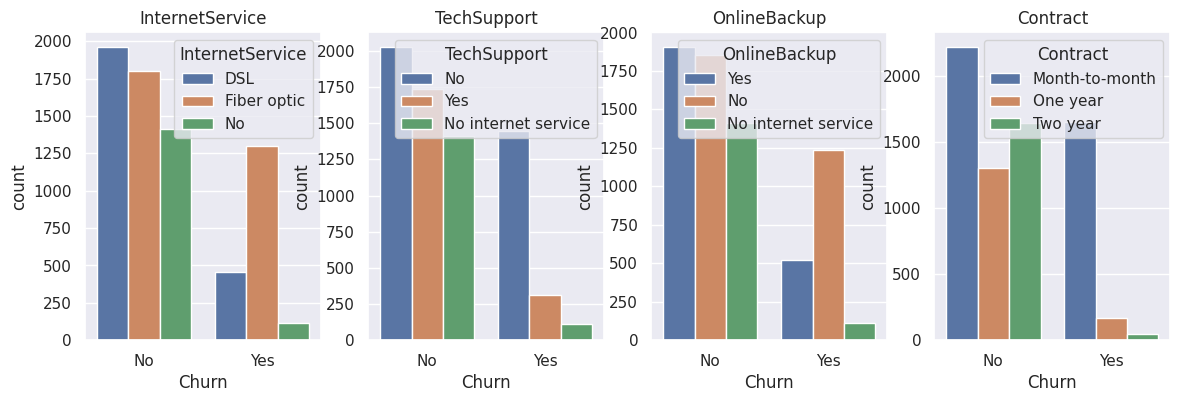

In [ ]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

# **DATA PREPARATION**

In [ ]:
# as we see that there is extra categories which we have to convert it into No.
df.MultipleLines = df.MultipleLines.replace('No phone service','No')
df.OnlineSecurity = df.OnlineSecurity.replace('No internet service','No')
df.OnlineBackup = df.OnlineBackup.replace('No internet service','No')
df.DeviceProtection = df.DeviceProtection.replace('No internet service','No')
df.TechSupport = df.TechSupport.replace('No internet service','No')
df.StreamingTV = df.StreamingTV.replace('No internet service','No')
df.StreamingMovies = df.StreamingMovies.replace('No internet service','No')

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# HANDLING CATEGORICAL VARIABLES


In [ ]:
# we will convert Yes = 1 and No = 0
for i in cat:
    df[i] = df[i].replace('Yes',1)
    df[i] = df[i].replace('No',0)

In [ ]:
# we will convert male = 1 and female = 0
df.gender = df.gender.replace('Male',1)
df.gender = df.gender.replace('Female',0)

In [ ]:
df['InternetService'] = [str(x) for x in df['InternetService']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['InternetService'] = label.fit_transform(df['InternetService'])
df['Contract'] = label.fit_transform(df['Contract'])
df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# HANDLING NUMERICAL VARIABLES

In [ ]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
# now we scaling all the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[scale_cols] = scale.fit_transform(df[scale_cols])

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,1,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,1,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,1,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,0,1,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,2,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,1,0,1,1,1,1,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,2,0,1,1,0,1,1,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.152778,0,0,1,1,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.055556,1,1,2,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


In [ ]:
df.head().T

,0,1,2,3,4
gender,0.000000,1.000000,1.000000,1.000000,0.000000
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Partner,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,0.013889,0.472222,0.027778,0.625000,0.027778
PhoneService,0.000000,1.000000,1.000000,0.000000,1.000000
MultipleLines,0.000000,0.000000,0.000000,0.000000,0.000000
InternetService,1.000000,1.000000,1.000000,1.000000,2.000000
OnlineSecurity,0.000000,1.000000,1.000000,1.000000,0.000000
OnlineBackup,1.000000,0.000000,1.000000,0.000000,0.000000


# TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

df = df.dropna()
#df = df.drop(['customerID'],axis=1)

X = df.drop(['Churn'],axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# OVERSAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [ ]:
y_train.value_counts()

0    4113
1    4113
Name: Churn, dtype: int64

# MODEL BUILDING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
print("---------------------------------------")
print("-------- LogisticRegression ----------")
print("---------------------------------------")

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Precision:", precision_score(y_test, lr_y_pred))
print("Recall:", recall_score(y_test, lr_y_pred))
print("F1 score:", f1_score(y_test, lr_y_pred))

print("---------------------------------------")
print("-------- DecisionTreeClassifier ----------")
print("---------------------------------------")

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Precision:", precision_score(y_test, dt_y_pred))
print("Recall:", recall_score(y_test, dt_y_pred))
print("F1 score:", f1_score(y_test, dt_y_pred))


print("---------------------------------------")
print("-------- RandomForestClassifier ----------")
print("---------------------------------------")

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("F1 score:", f1_score(y_test, rf_y_pred))

---------------------------------------
-------- LogisticRegression ----------
---------------------------------------
Logistic Regression
Accuracy: 0.765791341376863
Precision: 0.5169811320754717
Recall: 0.7873563218390804
F1 score: 0.6241457858769932
---------------------------------------
-------- DecisionTreeClassifier ----------
---------------------------------------
Decision Tree
Accuracy: 0.71611071682044
Precision: 0.4444444444444444
Recall: 0.5977011494252874
F1 score: 0.5098039215686275
---------------------------------------
-------- RandomForestClassifier ----------
---------------------------------------
Random Forest
Accuracy: 0.7828246983676366
Precision: 0.547085201793722
Recall: 0.7011494252873564
F1 score: 0.6146095717884131


# MODEL EVALUATION

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Classification report - ")
print(classification_report(y_test,lr_y_pred))

Classification report - 
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1061
           1       0.52      0.79      0.62       348

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.82      0.77      0.78      1409



Text(0.5, 1.0, 'Accuracy Score: 0.765791341376863')

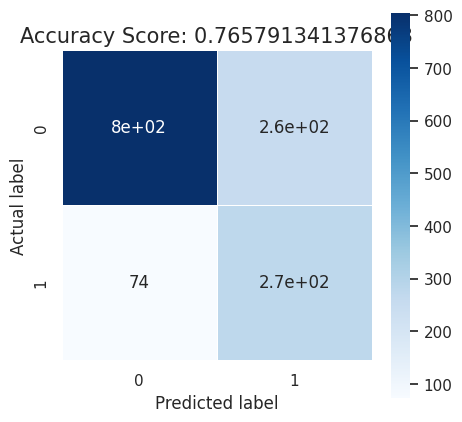

In [ ]:
cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

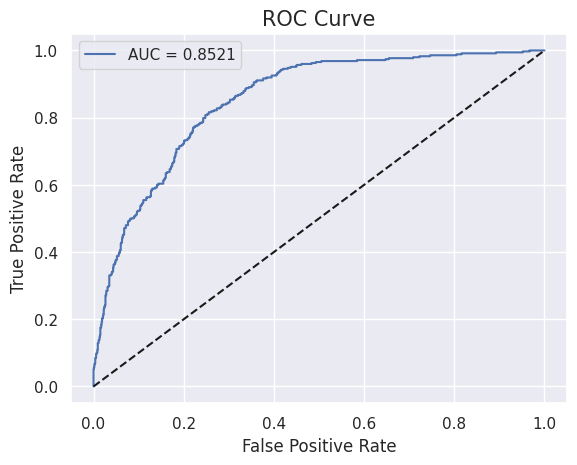

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

**RANDOM FOREST**

In [ ]:
print("Classification report - ")
print(classification_report(y_test,rf_y_pred))

Classification report - 
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1061
           1       0.55      0.70      0.61       348

    accuracy                           0.78      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.81      0.78      0.79      1409



Text(0.5, 1.0, 'Accuracy Score: 0.7828246983676366')

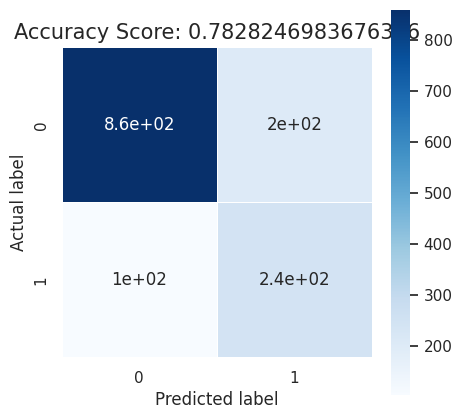

In [ ]:
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

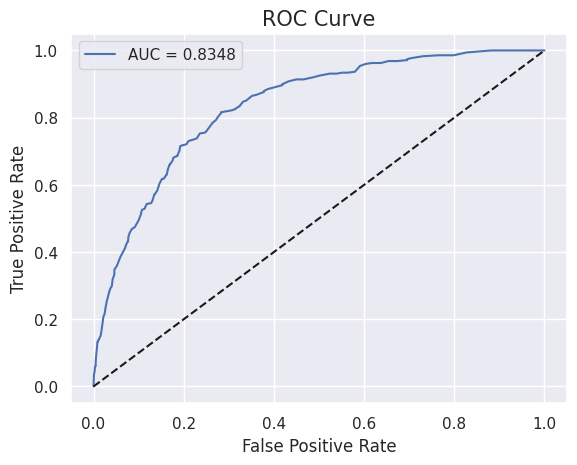

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rf.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

**DECISION TREE**

In [ ]:
print("Classification report - ")
print(classification_report(y_test,dt_y_pred))

Classification report - 
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1061
           1       0.44      0.60      0.51       348

    accuracy                           0.72      1409
   macro avg       0.65      0.68      0.66      1409
weighted avg       0.75      0.72      0.73      1409



Text(0.5, 1.0, 'Accuracy Score: 0.71611071682044')

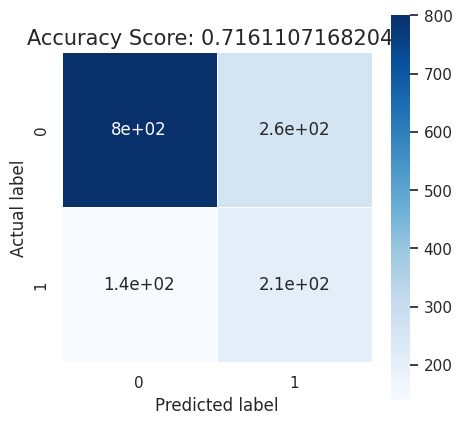

In [ ]:
cm = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

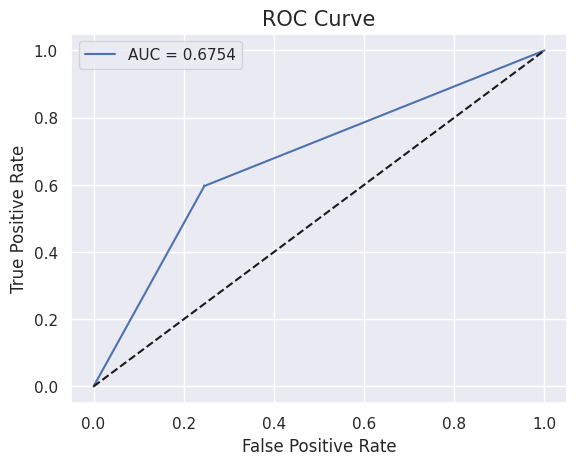

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dt.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()